<a href="https://colab.research.google.com/github/mkundhal/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Mandeep_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. 
Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a 
crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, 
understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services 
and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :

1.   What can we learn about different hosts and areas?
2.   What can we learn from predictions? (ex: locations, prices, reviews, etc)
3.   Which hosts are the busiest and why?
4.   Is there any noticeable difference of traffic among different areas and what could be the reason for it?







In [3]:
#import the important library files to perform action on dataframes and for plotting graphs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 

In [2]:
#mounted the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#read the database file from mounted google drive into dataframe df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_data Science /Module 1_Python/Pandas_Data/Airbnb NYC 2019.csv')

In [23]:
#Display first 5 rows of the dataframe to understand the information present in the database
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [6]:
#understand the type of data in each column and non null value count in each column 
df.info()
df.dropna(subset = ['last_review', 'reviews_per_month'],inplace=True)
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


  **No of host in each neighbourhood_group**



In [7]:
#converted the object type column into string to perform action 
df["neighbourhood_group"]=df["neighbourhood_group"].astype('string')
df["neighbourhood"]=df["neighbourhood"].astype('string')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  string 
 5   neighbourhood                   38843 non-null  string 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


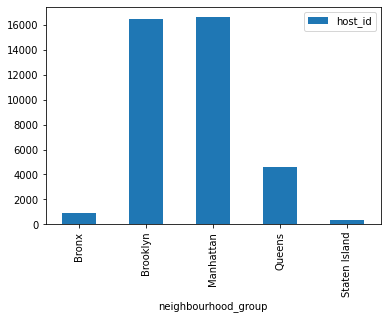

In [8]:
 #plotted the no of host in each neighbourhood group  
 df.groupby(['neighbourhood_group']).count().plot(kind='bar',y='host_id')
 #this shows that no of host are more in Brooklyn and Manhattan and assume that these are favourite destination for travellers 

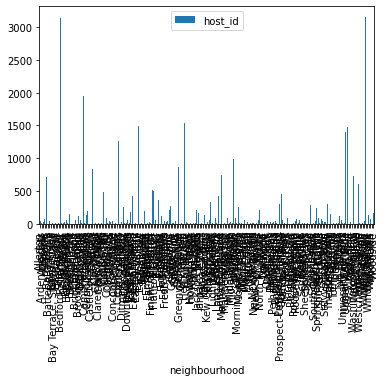

In [9]:


df.groupby(['neighbourhood']).count().plot(kind='bar',y='host_id')

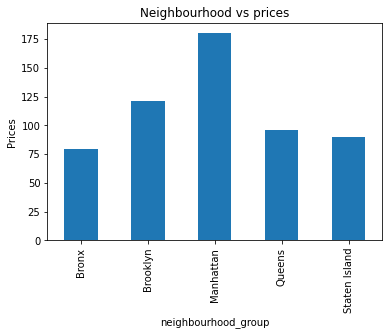

In [10]:
df.groupby(['neighbourhood_group']) ['price'].mean().plot(kind="bar", ylabel='Prices', title='Neighbourhood vs prices')

    

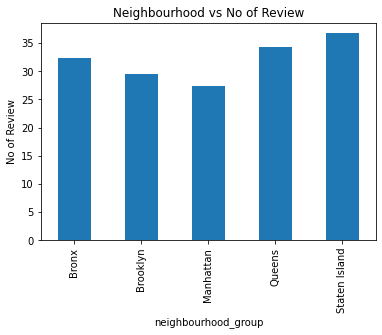

In [11]:
df.groupby(['neighbourhood_group']) ['number_of_reviews'].mean().plot(kind="bar", ylabel='No of Review', title='Neighbourhood vs No of Review')


In [12]:
df_low_availability = df.sort_values(by=['availability_365','reviews_per_month'], ascending=[True,False])
df_low_availability

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22104,17779504,Relaxing Quiet Room Just 6 Mins from JFK Airport!,121391142,Deloris,Queens,Springfield Gardens,40.66535,-73.76367,Private room,65,1,368,2019-06-21,13.24,2,0
22100,17777654,Bright Comfy Quiet Room Just 6 Mins from JFK!,121391142,Deloris,Queens,Springfield Gardens,40.66600,-73.76333,Private room,65,1,325,2019-06-12,11.72,2,0
35014,27759146,Cozy corner near Empire State Building,209549523,Mariluz,Manhattan,Midtown,40.74858,-73.98341,Shared room,62,1,112,2019-06-13,10.77,3,0
37652,29855428,Cozy 1 bedroom Apartment 5 min from LGA!,7849770,Melitza,Queens,East Elmhurst,40.76373,-73.86508,Entire home/apt,70,1,83,2019-07-07,10.29,1,0
1614,732700,Centrally located and spacious apt.,3815537,Reshma,Manhattan,Midtown,40.75154,-73.97104,Entire home/apt,106,7,10,2019-07-06,10.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
1426,640589,Sweet Super Bowl Accomodations,3198479,Gina,Manhattan,West Village,40.73727,-74.00213,Entire home/apt,700,5,1,2012-09-18,0.01,1,365
1458,652691,COLUMBUS CIRCLE~100% FURNISHED W.58,1475015,Mike,Manhattan,Upper West Side,40.76934,-73.98464,Entire home/apt,95,30,1,2012-11-01,0.01,52,365
1801,808476,Great Space / Private Room,3775799,Wendee,Manhattan,Harlem,40.83378,-73.94966,Private room,85,1,1,2013-11-01,0.01,1,365


In [15]:
df_zero_availability= df_low_availability[df_low_availability['availability_365']==0]
df_zero_availability                                   

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22104,17779504,Relaxing Quiet Room Just 6 Mins from JFK Airport!,121391142,Deloris,Queens,Springfield Gardens,40.66535,-73.76367,Private room,65,1,368,2019-06-21,13.24,2,0
22100,17777654,Bright Comfy Quiet Room Just 6 Mins from JFK!,121391142,Deloris,Queens,Springfield Gardens,40.66600,-73.76333,Private room,65,1,325,2019-06-12,11.72,2,0
35014,27759146,Cozy corner near Empire State Building,209549523,Mariluz,Manhattan,Midtown,40.74858,-73.98341,Shared room,62,1,112,2019-06-13,10.77,3,0
37652,29855428,Cozy 1 bedroom Apartment 5 min from LGA!,7849770,Melitza,Queens,East Elmhurst,40.76373,-73.86508,Entire home/apt,70,1,83,2019-07-07,10.29,1,0
1614,732700,Centrally located and spacious apt.,3815537,Reshma,Manhattan,Midtown,40.75154,-73.97104,Entire home/apt,106,7,10,2019-07-06,10.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,1987949,3 Bedroom Apt. in Washington Height,10252755,Lauren,Manhattan,Washington Heights,40.84082,-73.93896,Entire home/apt,145,3,1,2014-01-02,0.01,1,0
3396,2037508,Bed Stuy Apartment One Bedroom,10211848,Ben,Brooklyn,Bedford-Stuyvesant,40.68390,-73.94446,Entire home/apt,75,4,1,2014-01-03,0.01,1,0
3433,2060275,NoHa Living,10545845,Evan,Manhattan,East Harlem,40.80797,-73.93686,Private room,179,1,1,2013-12-14,0.01,1,0
3478,2082694,Brand New 3BR Apartment,10638711,Corey,Brooklyn,Williamsburg,40.70958,-73.94287,Entire home/apt,700,3,1,2014-01-02,0.01,1,0


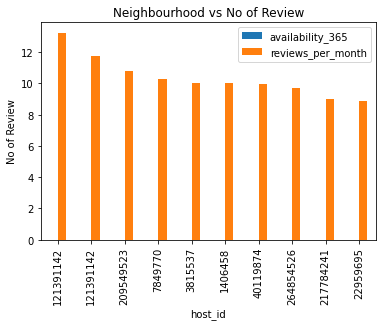

In [16]:
df_zero_availability.head(10).plot(kind="bar", x='host_id', y=['availability_365','reviews_per_month'],ylabel='No of Review', title='Neighbourhood vs No of Review')

In [17]:
df['neighbourhood_group'].unique()

<StringArray>
['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Length: 5, dtype: string

In [20]:
top_host_id = df['host_id'].value_counts().head(10)
top_host_id

219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
190921808     46
30283594      43
1475015       42
120762452     40
2119276       39
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '61391963'),
 Text(0, 0, '16098958'),
 Text(0, 0, '137358866'),
 Text(0, 0, '7503643'),
 Text(0, 0, '190921808'),
 Text(0, 0, '30283594'),
 Text(0, 0, '1475015'),
 Text(0, 0, '120762452'),
 Text(0, 0, '2119276')]

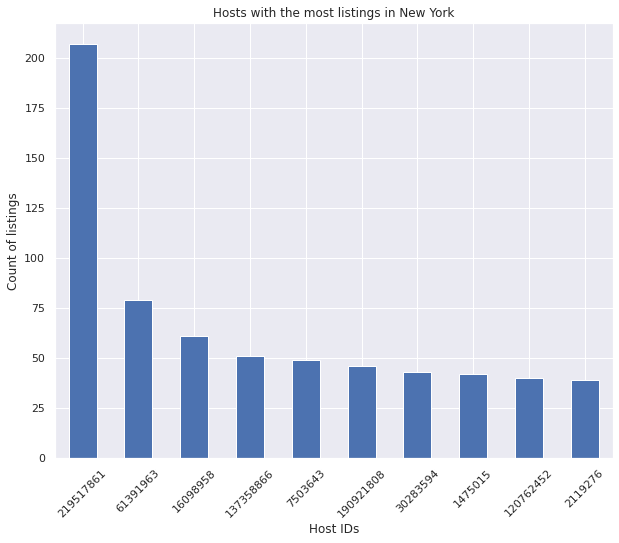

In [19]:
sns.set(rc={'figure.figsize':(10,8)})

top_host_id_plot = top_host_id.plot(kind='bar')
top_host_id_plot.set_title('Hosts with the most listings in New York')
top_host_id_plot.set_xlabel('Host IDs')
top_host_id_plot.set_ylabel('Count of listings')
top_host_id_plot.set_xticklabels(top_host_id_plot.get_xticklabels(), rotation=45)

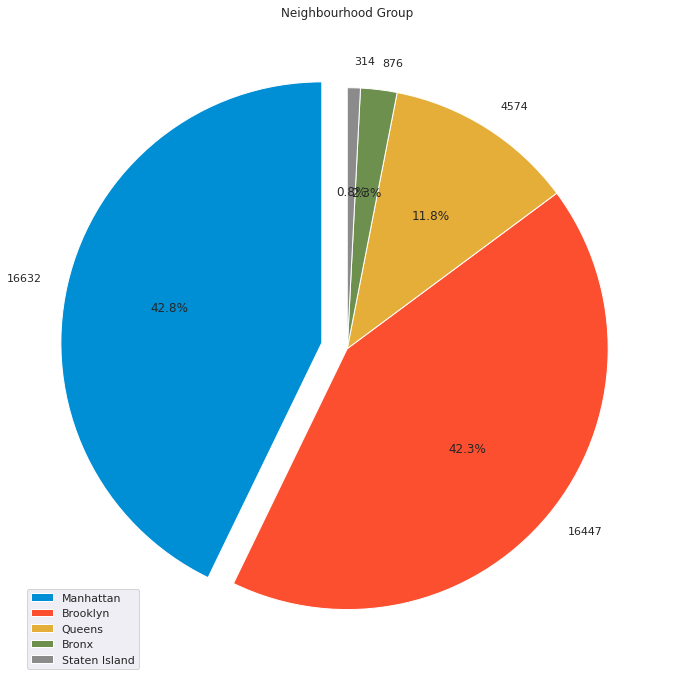

In [21]:
labels = df.neighbourhood_group.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = df.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [25]:
plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
BBox = (103.5935, 104.0625, 1.1775, 1.5050)
sg_map = plt.imread('map_bnw.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
groups = df.groupby('neighbourhood_group')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

FileNotFoundError: ignored

<Figure size 1296x864 with 0 Axes>